In [1]:
# Pytorch的层次结构从低到高可以分成如下五层。 

# 最底层为硬件层，Pytorch支持CPU、GPU加入计算资源池。 

# 第二层为C++实现的内核。

# 第三层为Python实现的操作符，
# 提供了封装C++内核的低级API指令，
# 主要包括各种张量操作算子、自动微分、变量管理. 
# 如torch.tensor,torch.cat,torch.autograd.grad,nn.Module. 
# 如果把模型 比作一个房子，那么第三层API就是【模型之砖】。

# 第四层为Python实现的模型组件，对低级API进行了函数封装，
# 主要包括各种模型层，损失函数，优化器，数据管道等等。 
# 如 torch.nn.Linear,torch.nn.BCE,torch.optim.Adam,torch.utils.data.DataLoader. 
# 如果把模型比作一 个房子，那么第四层API就是【模型之墙】。

# 第五层为Python实现的模型接口。Pytorch没有官方的高阶API。
# 为了便于训练模型，仿照 keras中的模型接口，
# 使用了不到300行代码，封装了Pytorch的高阶模型接口
# torchkeras.Model。
# 如果把模型比作一个房子，那么第五层API就是模型本身，即【模型之屋】。

In [4]:
# 一、线性回归模型

# 1. 准备数据

import numpy as np
import torch
from matplotlib import pyplot as plt
import pandas as pd
from torch import nn

# 样本数量
n = 400

# 生成测试用数据集

X = 10*torch.rand([n,2]) - 5.0 #torch.rand是均匀分布
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal(0.0,2.0,size = [n,1])
# @表示矩阵乘法，增加动态扰动

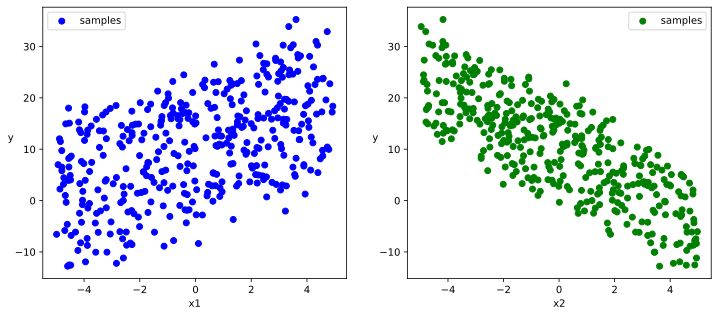

In [6]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0].numpy(),Y[:,0].numpy(),c = "b", label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y", rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1].numpy(),Y[:,0].numpy(),c = "g", label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()

In [9]:
# 构建数据管道迭代器

def data_iter(features, labels, batcj_size = 8):
    num_examples = len(features)
    indices = list(range(num_examples))
    np.random.shuffle(indices)  # 随机顺序读取样本
    
    for i in range(0,num_examples,batch_size):
        indexs = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,indexs),labels.index_select(0,indexs)
        
# 测试数据管道效果

batch_size = 8
(features, labels) = next(data_iter(X,Y,batch_size))
print(features)
print(labels)

tensor([[-0.5062, -3.2403],
        [-0.7736, -0.6872],
        [ 2.3098, -4.4378],
        [-3.2009,  0.6585],
        [-0.5605, -1.0588],
        [ 1.2830,  0.1748],
        [ 2.6190, -1.0937],
        [ 2.9845, -3.4410]])
tensor([[17.8513],
        [ 9.1618],
        [28.2390],
        [-1.4104],
        [15.7671],
        [10.5925],
        [24.0553],
        [24.7169]])


In [10]:
# 2. 定义模型

class LinearRegression:
    def __init__(self):
        self.w = torch.randn_like(w0,requires_grad = True)
        self.b = torch.zeros_like(b0,requires_grad = True)
    
#     正向传播
    def forward(self,x):
        return x@self.w + self.b
    
#     损失函数
    def loss_func(self,y_pred,y_true):
        return torch.mean((y_pred - y_true)**2/2)
    
model = LinearRegression()

In [ ]:
# 3. 训练模型

